In [22]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

In [69]:
x,y = make_circles(n_samples=500,noise = 0.02)

In [72]:
x.shape,y.shape

((500, 2), (500,))

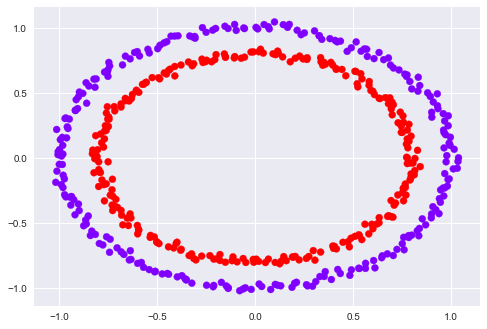

In [73]:
plt.style.use('seaborn')
plt.scatter(x[:,0],x[:,1],c = y,cmap = 'rainbow')
plt.show()

In [74]:
def phi(x):
    """NON linear transformation"""
    x1 = x[:,0]
    x2  = x[:,1]
    x3 = x1**2 + x2**2
    
    x_ = np.zeros((x.shape[0],3))
    print(x_.shape)
    
    x_[:,:-1] = x
    x_[:,-1] = x3
    return x_
    

In [75]:
x_ =phi(x)

(500, 3)


In [76]:
print(x[:3,:])

[[-0.96198209  0.15449962]
 [ 0.1328618  -0.79428759]
 [-0.26639486  0.73460723]]


In [77]:
print(x_[:3,:])

[[-0.96198209  0.15449962  0.94927968]
 [ 0.1328618  -0.79428759  0.64854503]
 [-0.26639486  0.73460723  0.61061401]]


In [97]:
def plot3d(x,show = True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection = '3d')
    x1 = x[:,0]
    x2 = x[:,1]
    x3 = x[:,2]
    
    ax.scatter(x1,x2,x3,zdir='z',s = 20,c = y,depthshade = True,cmap  ='rainbow')
    if show==True:
        plt.show()
    return ax

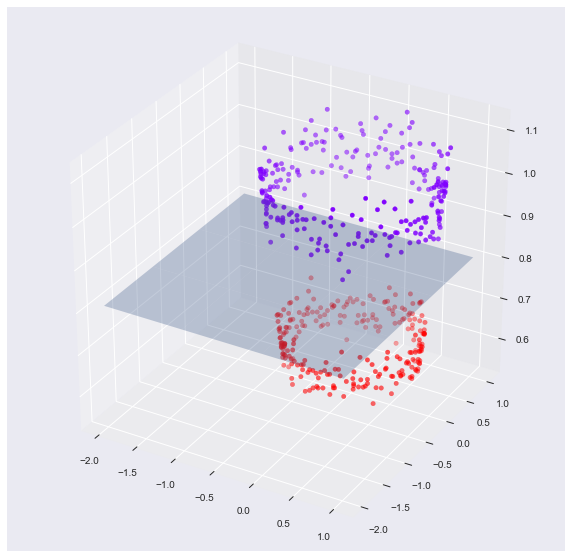

In [105]:
ax = plot3d(x_,False)

ax.plot_surface(xx,yy,z,alpha = 0.3)
plt.show()

Logistic Classifier

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [81]:
lr = LogisticRegression()

In [82]:
acc = cross_val_score(lr,x,y,cv = 5).mean()

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [83]:
print(acc*100)

47.0


Logistic Classifier on Higher Dimension Space

In [84]:
acc = cross_val_score(lr,x_,y,cv = 5).mean()

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [85]:
print(acc*100)

100.0


### visualise the Decision Surface

In [86]:
lr.fit(x_,y)

C:\Users\ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
wts = lr.coef_

In [92]:
bias = lr.intercept_

In [90]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [95]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]

In [96]:
z

array([[0.81000432, 0.80847609, 0.80694786, 0.80541964],
       [0.81178239, 0.81025416, 0.80872593, 0.8071977 ],
       [0.81356046, 0.81203223, 0.810504  , 0.80897577],
       [0.81533853, 0.8138103 , 0.81228207, 0.81075384]])

In [106]:
import multiprocessing

In [107]:
cpu_count = multiprocessing.cpu_count()

In [109]:
print(cpu_count)

8
